In [3]:
import numpy as np
import pandas as pd
from reco_systems.filter import filter_df
from reco_systems.user_game_matrix import *
from reco_systems.CF_knn import *
import seaborn as sns
from reco_systems.evaluation import *

%load_ext autoreload
%autoreload 2

In [4]:
folder = "database_cleaned"
avis_clean = pd.read_csv(f"database_cleaned/avis_clean.csv", index_col=0)
jeux_clean = pd.read_csv(f"database_cleaned/jeux_clean.csv", index_col=0)
users = pd.read_csv(f"trictrac_database/users.csv", names=["Username", "User id"])

min_reviews = 5

In [5]:
rev_filter = filter_df(avis_clean, min_reviews)

11201 10549
3242 3957
3006 3910
3003 3910


In [6]:
matrix_ratings, mask_ratings, users_table_assoc, games_table_assoc = get_matrix_user_game(rev_filter)
mask_ratings

<Compressed Sparse Row sparse array of dtype 'float64'
	with 113446 stored elements and shape (3003, 3910)>

In [7]:
similarity_matrix, _ = calc_similarity_matrix(matrix_ratings, mask_ratings, "cos")
type(similarity_matrix)

numpy.ndarray

In [14]:
calc_RMSE_cos_vector = np.vectorize(calc_RMSE_cos, excluded=["matrix_ratings", "mask_ratings", "similarity_matrix"])
users_count = rev_filter[["User id", "Game id"]].groupby("User id", as_index=True).count().head(300)
users = users_table_assoc[users_table_assoc.isin(users.index)].index.to_numpy()

vectorized_func = np.vectorize(calc_RMSE_cos, excluded=['matrix_ratings', 'mask_ratings', 'similarity_matrix'])
result = vectorized_func(users, matrix_ratings=matrix_ratings, mask_ratings=mask_ratings, similarity_matrix=similarity_matrix)


AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [ ]:
rmse_users = pd.DataFrame(zip(users, result), columns=["User id", "RMSE"]).merge(users_count, on ="User id")
rmse_users.columns = ["User id", "RMSE", "Count reviews"]
rmse_users.sort_values(by="Count reviews", inplace=True)


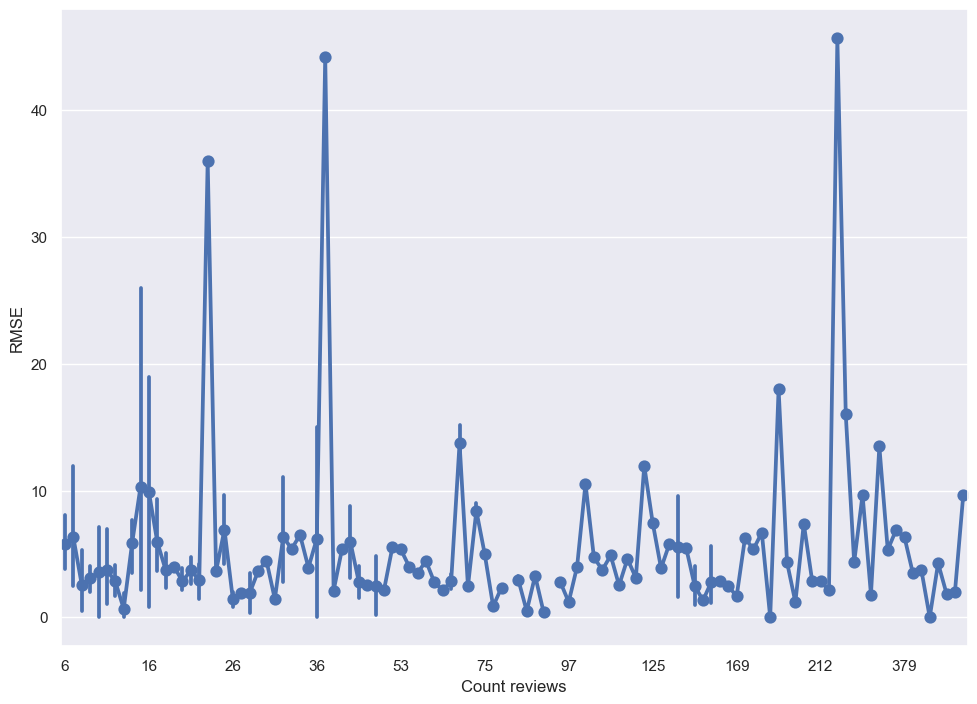

In [51]:
#sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
n_ticks = 5  # Number of ticks you want to show
ax = sns.pointplot(data=rmse_users, y="RMSE", x="Count reviews")

for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

In [35]:
matrix_ratings.todok()[0][4, 5]

TypeError: 'coo_array' object is not subscriptable